<a href="https://colab.research.google.com/github/siddhantsangwan/collab_filtering_movielens/blob/master/movielens_collab_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [ ]:
from fastai.collab import *
from fastai.tabular import*

In [ ]:
base  = Path('/content/drive/My Drive/fastai-v3/collab_movielens')
base

PosixPath('/content/drive/My Drive/fastai-v3/collab_movielens')

In [ ]:
path = untar_data(URLs.ML_SAMPLE)
path

PosixPath('/root/.fastai/data/movie_lens_sample')

In [ ]:
path.ls()

[PosixPath('/root/.fastai/data/movie_lens_sample/ratings.csv')]

In [ ]:
df = pd.read_csv(path/'ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


In [ ]:
min(df['rating'])

0.5

In [ ]:
data = CollabDataBunch.from_df(df, seed=42)

In [ ]:
y_range = [0, 5.5]  # 0-5.5 is convinient to then put through a sigmoid and avoiding meaningless ratings
learn = collab_learner(data, n_factors=50, y_range=y_range) #using 50 'features' of users and items each
learn.lr_find()

epoch,train_loss,valid_loss,time
0,1.827772,#na#,00:01


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


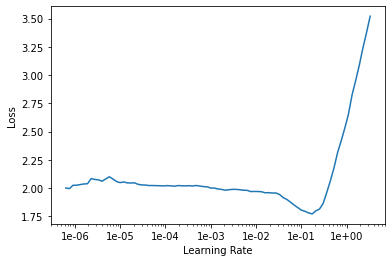

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(3, 1e-2)

epoch,train_loss,valid_loss,time
0,1.330889,0.766885,00:01
1,0.766904,0.667921,00:01
2,0.547194,0.652105,00:01


In [ ]:
learn.fit_one_cycle(2, 1e-2)

epoch,train_loss,valid_loss,time
0,0.480541,0.656316,00:01
1,0.382667,0.664526,00:00


In [ ]:
learn2 = collab_learner(data, n_factors=50, y_range=y_range)
learn2.fit_one_cycle(3, 1e-2)

epoch,train_loss,valid_loss,time
0,1.315150,0.772898,00:01
1,0.764578,0.681009,00:01
2,0.575616,0.665114,00:01


In [ ]:
learn2.fit(1, 1e-3)

epoch,train_loss,valid_loss,time
0,0.472801,0.653114,00:00


In [ ]:
learn2.save(base, 'sample')

PosixPath('/content/drive/My Drive/fastai-v3/collab_movielens.pth')

In [ ]:
path = Config.data_path()
path

PosixPath('/root/.fastai/data')

In [ ]:
!cp -r /content/drive/My\ Drive/fastai-v3/ml-100k /root/.fastai/data/

In [ ]:
# using the movielens 100k dataset provided by grouplens
path = Path(path/'ml-100k')

In [ ]:
path.ls()

[PosixPath('/root/.fastai/data/ml-100k/u.user'),
 PosixPath('/root/.fastai/data/ml-100k/u5.test'),
 PosixPath('/root/.fastai/data/ml-100k/u1.base'),
 PosixPath('/root/.fastai/data/ml-100k/u1.test'),
 PosixPath('/root/.fastai/data/ml-100k/mku.sh'),
 PosixPath('/root/.fastai/data/ml-100k/allbut.pl'),
 PosixPath('/root/.fastai/data/ml-100k/u.data'),
 PosixPath('/root/.fastai/data/ml-100k/u4.test'),
 PosixPath('/root/.fastai/data/ml-100k/ub.test'),
 PosixPath('/root/.fastai/data/ml-100k/u3.test'),
 PosixPath('/root/.fastai/data/ml-100k/u.info'),
 PosixPath('/root/.fastai/data/ml-100k/u4.base'),
 PosixPath('/root/.fastai/data/ml-100k/u.occupation'),
 PosixPath('/root/.fastai/data/ml-100k/ua.base'),
 PosixPath('/root/.fastai/data/ml-100k/ua.test'),
 PosixPath('/root/.fastai/data/ml-100k/u2.base'),
 PosixPath('/root/.fastai/data/ml-100k/README'),
 PosixPath('/root/.fastai/data/ml-100k/u2.test'),
 PosixPath('/root/.fastai/data/ml-100k/u5.base'),
 PosixPath('/root/.fastai/data/ml-100k/ub.base')

In [ ]:
with open(path/'README', 'r') as fr:
  print(fr.read())

SUMMARY & USAGE LICENSE

MovieLens data sets were collected by the GroupLens Research Project
at the University of Minnesota.
 
This data set consists of:
	* 100,000 ratings (1-5) from 943 users on 1682 movies. 
	* Each user has rated at least 20 movies. 
        * Simple demographic info for the users (age, gender, occupation, zip)

The data was collected through the MovieLens web site
(movielens.umn.edu) during the seven-month period from September 19th, 
1997 through April 22nd, 1998. This data has been cleaned up - users
who had less than 20 ratings or did not have complete demographic
information were removed from this data set. Detailed descriptions of
the data file can be found at the end of this file.

Neither the University of Minnesota nor any of the researchers
involved can guarantee the correctness of the data, its suitability
for any particular purpose, or the validity of results based on the
use of the data set.  The data set may be used for any research
purposes under th